<a href="https://colab.research.google.com/github/datadudejon/Portfolio_projects/blob/main/Medical_insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [ ]:
# Load dataset
medical_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
medical_df = pd.read_csv(medical_url)

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# get summary statistics
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# review the distribution of ages
fig = px.histogram(medical_df,
                   x="age",
                   marginal='box',
                   nbins=47,
                   title= 'Distribution of Ages')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
# review the BMI distribution
fig = px.histogram(medical_df,
                   x="bmi",
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title= 'BMI distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
# annual medical charges
fig = px.histogram(medical_df,
                   x="charges",
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title= 'Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
# Smoking status
medical_df.value_counts('smoker')

,count
smoker,
no,1064
yes,274


In [ ]:
# Smoking status response
fig = px.histogram(medical_df,
                   x="smoker",
                   color='sex',
                   title= 'Smoker')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
# Age and Charge relationship
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity= 0.8,
                 hover_data=['sex'],
                 title= 'Age Vs. relationship')
fig.show()

In [ ]:
# BMI vs CHarges
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity= 0.8,
                 hover_data=['sex'],
                 title= 'BMI Vs. Charges')
fig.show()

In [ ]:
px.violin(medical_df, x = "children", y = "smoker")

In [ ]:
# correlation analysis
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

In [ ]:
smoker_values = {'no':0, 'yes':1}
smoker_num = medical_df.smoker.map(smoker_values)
sex_values = {'male':0, 'female':1}
sex_num = medical_df.sex.map(sex_values)

In [ ]:
# Determine correlation between charges and smoker status
medical_df.charges.corr(smoker_num)

0.787251430498478

##**Linear Regression using a Single Variable.**
From the above EDA, it is clear that the "age" and "smoker" columns have the strongest correlation with "charges". Now, I'll attempt to estimate the value of "charges" using the age of non-smokers.

In [ ]:
# Create a dataframe consisting of data for only non-smokers
non_smoker_df = medical_df[medical_df.smoker == 'no']

<Axes: title={'center': 'Age Vs. Charges'}, xlabel='age', ylabel='charges'>

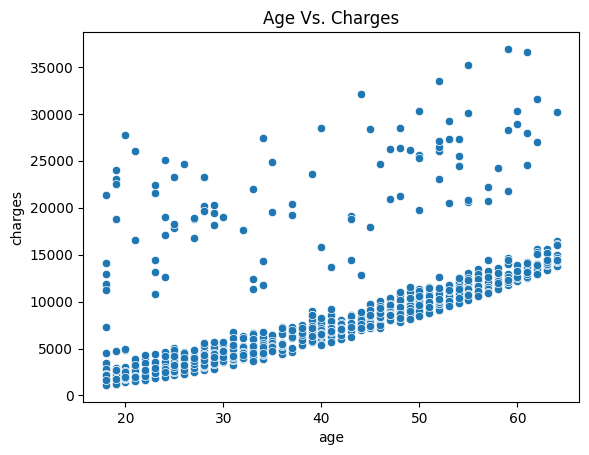

In [ ]:
# Visualize relatonship between age and charges
plt.title('Age Vs. Charges')
sns.scatterplot(x = 'age', y = 'charges', data = non_smoker_df)

In [ ]:
# Import scikitlearn
from sklearn.linear_model import LinearRegression

In [ ]:
# Create model object
model = LinearRegression()

In [ ]:
# Use fit method of the model to determine the best fit line for the inputs and targets
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
# The input X= is required to be a dataframe.
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges']

print('inputs.shape: ', inputs.shape)
print('targets.shape: ', targets.shape)

inputs.shape:  (1064, 1)
targets.shape:  (1064,)


In [ ]:
# Fit the model to the data
model.fit(inputs, targets)

LinearRegression()

In [ ]:
# Testing predictions for ages 23, 37 and 61
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
# Computing predictions for the entire set of inputs
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
# Compute Root Mean Squared Error (RMSE) to evaluate the model
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))
rmse(targets, predictions)

4662.505766636395

In [ ]:
# View Model Parameters for w and b, i.e the intercept and the slope respectively
# w
model.coef_

array([267.24891283])

In [ ]:
# b
model.intercept_

-2091.4205565650864

**Predicting charges for smokers**

In [ ]:
# Create dataframe for smokers
smokers_df = medical_df[medical_df.smoker == 'yes']

<Axes: title={'center': 'Age Vs. Charges'}, xlabel='age', ylabel='charges'>

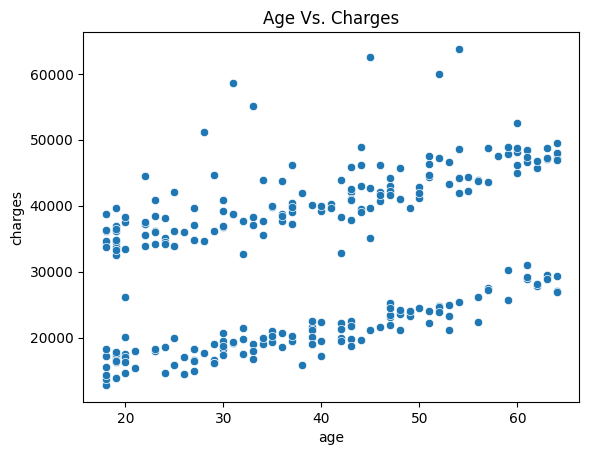

In [ ]:
# Visualiza the relationship betwwene the ages and the charges
plt.title('Age Vs. Charges')
sns.scatterplot(x = 'age', y = 'charges', data = smokers_df)

In [ ]:
# Fit the model
model2 = LinearRegression()
inputs2 = smokers_df[['age']]
targets2 = smokers_df['charges']
model2.fit(inputs2, targets2)

LinearRegression()

In [ ]:
# Make predictions
predictions2 = model2.predict(inputs2)
predictions2

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [ ]:
# compute rsme
rmse(targets2, predictions2)

10711.00334810241

Making use of SDGRegressor class to train the model. The "Stochastic Gradient Descent" approach.


In [ ]:
# import the SDGRegressor class
from sklearn.linear_model import SGDRegressor

In [ ]:
# For non_smokers
model3 = SGDRegressor()
model3.fit(inputs, targets)

SGDRegressor()

In [ ]:
# Make predictions
predictions3 = model3.predict(inputs)
predictions3

array([ 721.14305158, 3541.77551847, 4952.09175191, ...,  721.14305158,
        721.14305158, 1567.33279165])

In [ ]:
# Compute RSME
rmse(targets, predictions3)

4960.702563595331

In [ ]:
# For smokers
model4 = SGDRegressor()
model4.fit(inputs2, targets2)

SGDRegressor()

In [ ]:
# Make predictions
predictions4 = model4.predict(inputs2)
predictions4

array([-4.45540630e+10, -1.27129444e+11, -5.99169246e+10, -6.56779977e+10,
       -7.33594285e+10, -6.75983554e+10, -5.03151361e+10, -6.18372823e+10,
       -7.52797862e+10, -1.23288729e+11, -7.72001439e+10, -1.00244436e+11,
       -7.72001439e+10, -1.19448013e+11, -4.26337053e+10, -1.09846225e+11,
       -4.64744207e+10, -6.18372823e+10, -5.99169246e+10, -5.03151361e+10,
       -7.91205016e+10, -9.44833631e+10, -1.17527655e+11, -1.21368371e+11,
       -1.30970159e+11, -1.15607298e+11, -8.10408592e+10, -1.25209086e+11,
       -4.64744207e+10, -1.29049802e+11, -6.37576400e+10, -9.25630054e+10,
       -4.45540630e+10, -6.95187131e+10, -7.33594285e+10, -6.56779977e+10,
       -9.64037208e+10, -8.87222900e+10, -1.00244436e+11, -4.26337053e+10,
       -6.56779977e+10, -8.87222900e+10, -4.26337053e+10, -1.29049802e+11,
       -7.72001439e+10, -5.99169246e+10, -7.52797862e+10, -4.45540630e+10,
       -8.87222900e+10, -8.48815746e+10, -4.45540630e+10, -5.22354938e+10,
       -1.29049802e+11, -

In [ ]:
# computer RSME
rmse(targets2, predictions4)

86261572247.08713

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create a standard scalar object
scaler = StandardScaler()

# Fit the scalar to the smoker features and transform them.
scaled_inputs = scaler.fit_transform(inputs2)
scaled_inputs

array([[-1.40415473],
       [ 1.68987015],
       [-0.82852219],
       [-0.61265999],
       [-0.32484373],
       [-0.54070593],
       [-1.18829253],
       [-0.75656813],
       [-0.25288966],
       [ 1.54596201],
       [-0.18093559],
       [ 0.68251321],
       [-0.18093559],
       [ 1.40205388],
       [-1.47610879],
       [ 1.04228354],
       [-1.33220066],
       [-0.75656813],
       [-0.82852219],
       [-1.18829253],
       [-0.10898152],
       [ 0.46665101],
       [ 1.33009981],
       [ 1.47400795],
       [ 1.83377828],
       [ 1.25814575],
       [-0.03702746],
       [ 1.61791608],
       [-1.33220066],
       [ 1.76182421],
       [-0.68461406],
       [ 0.39469694],
       [-1.40415473],
       [-0.46875186],
       [-0.32484373],
       [-0.61265999],
       [ 0.53860508],
       [ 0.25078881],
       [ 0.68251321],
       [-1.47610879],
       [-0.61265999],
       [ 0.25078881],
       [-1.47610879],
       [ 1.76182421],
       [-0.18093559],
       [-0

In [ ]:
# Create an SDGRegressor object
model5 = SGDRegressor(random_state=42)
model5.fit(scaled_inputs, targets2)

SGDRegressor(random_state=42)

In [ ]:
# Make predictions on the scaled data
predictions5 = model5.predict(scaled_inputs)
predictions5

array([26127.85565741, 39226.12789003, 28564.74351464, 29478.57646111,
       30697.02038972, 29783.18744326, 27041.68860388, 28869.3544968 ,
       31001.63137187, 38616.90592572, 31306.24235403, 34961.57413987,
       31306.24235403, 38007.68396141, 25823.24467526, 36484.62905064,
       26432.46663957, 28869.3544968 , 28564.74351464, 27041.68860388,
       31610.85333618, 34047.74119341, 37703.07297926, 38312.29494356,
       39835.34985433, 37398.4619971 , 31915.46431834, 38921.51690787,
       26432.46663957, 39530.73887218, 29173.96547895, 33743.13021126,
       26127.85565741, 30087.79842541, 30697.02038972, 29478.57646111,
       34352.35217557, 33133.90824695, 34961.57413987, 25823.24467526,
       29478.57646111, 33133.90824695, 25823.24467526, 39530.73887218,
       31306.24235403, 28564.74351464, 31001.63137187, 26127.85565741,
       33133.90824695, 32524.68628264, 26127.85565741, 27346.29958603,
       39530.73887218, 25823.24467526, 39530.73887218, 36789.2400328 ,
      

In [ ]:
# Calculate the rsme
rmse(targets2, predictions5)

10711.029450839265

# **Making use of categorical data**

In [ ]:
# Making use of the smoker status column first.
smoker_status = {'no':0, 'yes':1}
medical_df["smoker_status"] = medical_df.smoker.map(smoker_status)

In [ ]:
# Correlation between the smoker_status and charges columns
medical_df.charges.corr(medical_df.smoker_status)

0.787251430498478

In [ ]:
# Define the features and targets
x = medical_df[['age', 'bmi', 'children', 'smoker_status']]
y = medical_df.charges

In [ ]:
# Train the Model
model6 = LinearRegression().fit(x, y)

In [ ]:
# Make predictions based on the model
predictions6 = model6.predict(x)

# Compute the loss
rmse(y, predictions6)

6056.439217188081

**Performing the same feature engineering technique to the 'sex' column**

In [ ]:
# Define sex_codes and map values respectively
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_codes'] = medical_df.sex.map(sex_codes)

In [ ]:
# check correlation
medical_df.charges.corr(medical_df.sex_codes)

0.057292062202025484

In [ ]:
# Define the features and targets
x_1 = medical_df[['age', 'bmi', 'children', 'smoker_status', 'sex_codes']]
y_1 = medical_df.charges

In [ ]:
# Train the Model
model7 = LinearRegression().fit(x_1, y_1)

In [ ]:
# Make predictions
predictions7 = model7.predict(x_1)

# Loss
rmse(y_1, predictions7)

6056.100708754546

Using One-hot encoding on the 'regions' column

In [ ]:
from sklearn import preprocessing

In [ ]:
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
# Assign the array to a respective columns
medical_df[enc.categories_[0]] = one_hot
medical_df


,age,sex,bmi,children,smoker,region,charges,smoker_status,sex_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
# Define the features and targets
x_2 = medical_df[['age', 'bmi', 'children', 'smoker_status', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']]
y_2 = medical_df['charges']

In [ ]:
# Fit model
model8 = LinearRegression().fit(x_2, y_2)

In [ ]:
# Make predictions
predictions8 = model8.predict(x_2)

# Loss
rmse(y_2, predictions8)

6041.6796511744515